## Problem2

Perform multilinear regression with price as the output variable and document the different RMSE values.

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

data = pd.read_csv('Computer_Data.csv')

In [2]:
data.shape

(6259, 11)

### Null values imputation

In [3]:
data.isnull().sum()

Unnamed: 0    0
price         0
speed         0
hd            0
ram           0
screen        0
cd            0
multi         0
premium       0
ads           0
trend         0
dtype: int64

We observe that Actual_Shipment_Time, Shipment_Delay and Delivery_Status are null for the same set of rows. Remaining null values (406) are in Planned_TimeofTravel. We can drop these 82008 rows.

In [43]:
#Drop null valued rows
#data.dropna(inplace=True)

In [4]:
data.shape

(6259, 11)

In [5]:
data.isnull().sum().sum()

0

In [6]:
data.head()

,Unnamed: 0,price,speed,hd,ram,screen,cd,multi,premium,ads,trend
0,1,1499,25,80,4,14,no,no,yes,94,1
1,2,1795,33,85,2,14,no,no,yes,94,1
2,3,1595,25,170,4,15,no,no,yes,94,1
3,4,1849,25,170,8,14,no,no,no,94,1
4,5,3295,33,340,16,14,no,no,yes,94,1


In [7]:
data.drop(['Unnamed: 0'],axis=1,inplace=True)

In [8]:
data.head()

,price,speed,hd,ram,screen,cd,multi,premium,ads,trend
0,1499,25,80,4,14,no,no,yes,94,1
1,1795,33,85,2,14,no,no,yes,94,1
2,1595,25,170,4,15,no,no,yes,94,1
3,1849,25,170,8,14,no,no,no,94,1
4,3295,33,340,16,14,no,no,yes,94,1


### EDA

In [9]:
data.premium.value_counts()

yes    5647
no      612
Name: premium, dtype: int64

In [10]:
data.multi.value_counts()

no     5386
yes     873
Name: multi, dtype: int64

In [14]:
data.cd.value_counts()

no     3351
yes    2908
Name: cd, dtype: int64

In [17]:
data.var()

C:\Users\AANAND~1.ORA\AppData\Local\Temp/ipykernel_13552/445316826.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data.var()


price     337333.234902
speed        447.649767
hd         66847.298501
ram           31.709275
screen         0.819234
ads         5600.319735
trend         61.999622
dtype: float64

In [12]:
data.columns

Index(['price', 'speed', 'hd', 'ram', 'screen', 'cd', 'multi', 'premium',
       'ads', 'trend'],
      dtype='object')

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6259 entries, 0 to 6258
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   price    6259 non-null   int64 
 1   speed    6259 non-null   int64 
 2   hd       6259 non-null   int64 
 3   ram      6259 non-null   int64 
 4   screen   6259 non-null   int64 
 5   cd       6259 non-null   object
 6   multi    6259 non-null   object
 7   premium  6259 non-null   object
 8   ads      6259 non-null   int64 
 9   trend    6259 non-null   int64 
dtypes: int64(7), object(3)
memory usage: 489.1+ KB


In [19]:
data.corr()

,price,speed,hd,ram,screen,ads,trend
price,1.000000,0.300976,0.430258,0.622748,0.296041,0.054540,-0.199987
speed,0.300976,1.000000,0.372304,0.234760,0.189074,-0.215232,0.405438
hd,0.430258,0.372304,1.000000,0.777726,0.232802,-0.323222,0.577790
ram,0.622748,0.234760,0.777726,1.000000,0.208954,-0.181670,0.276844
screen,0.296041,0.189074,0.232802,0.208954,1.000000,-0.093919,0.188614
ads,0.054540,-0.215232,-0.323222,-0.181670,-0.093919,1.000000,-0.318553
trend,-0.199987,0.405438,0.577790,0.276844,0.188614,-0.318553,1.000000


<AxesSubplot:>

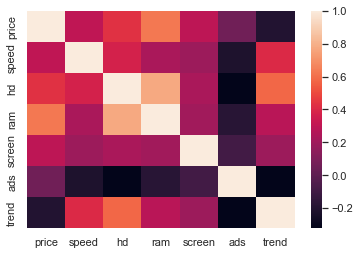

In [18]:
import seaborn as sns
sns.set()
sns.heatmap(data.corr())

In [51]:
import matplotlib.pyplot as plt

#### Label Encode

In [21]:
# Label encode Class variable
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
data['cd'] = encoder.fit_transform(data['cd'])
data['multi'] = encoder.fit_transform(data['multi'])
data['premium'] = encoder.fit_transform(data['premium'])

In [22]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6259 entries, 0 to 6258
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   price    6259 non-null   int64
 1   speed    6259 non-null   int64
 2   hd       6259 non-null   int64
 3   ram      6259 non-null   int64
 4   screen   6259 non-null   int64
 5   cd       6259 non-null   int32
 6   multi    6259 non-null   int32
 7   premium  6259 non-null   int32
 8   ads      6259 non-null   int64
 9   trend    6259 non-null   int64
dtypes: int32(3), int64(7)
memory usage: 415.8 KB


In [23]:
data.head()

,price,speed,hd,ram,screen,cd,multi,premium,ads,trend
0,1499,25,80,4,14,0,0,1,94,1
1,1795,33,85,2,14,0,0,1,94,1
2,1595,25,170,4,15,0,0,1,94,1
3,1849,25,170,8,14,0,0,0,94,1
4,3295,33,340,16,14,0,0,1,94,1


#### Drop Duplicates

In [24]:
data.duplicated().sum()

76

In [25]:
data.drop_duplicates(subset=None, keep='first', inplace=True)

In [26]:
data.duplicated().sum()

0

In [27]:
data.shape

(6183, 10)

In [28]:
data.dtypes

price      int64
speed      int64
hd         int64
ram        int64
screen     int64
cd         int32
multi      int32
premium    int32
ads        int64
trend      int64
dtype: object

In [29]:
data.columns

Index(['price', 'speed', 'hd', 'ram', 'screen', 'cd', 'multi', 'premium',
       'ads', 'trend'],
      dtype='object')

#### standardize

In [30]:
data.iloc[:,1:]

,speed,hd,ram,screen,cd,multi,premium,ads,trend
0,25,80,4,14,0,0,1,94,1
1,33,85,2,14,0,0,1,94,1
2,25,170,4,15,0,0,1,94,1
3,25,170,8,14,0,0,0,94,1
4,33,340,16,14,0,0,1,94,1
...,...,...,...,...,...,...,...,...,...
6254,100,528,8,15,0,0,1,39,35
6255,66,850,16,15,1,1,1,39,35
6256,100,1200,24,15,1,0,1,39,35
6257,100,850,16,15,1,0,1,39,35


In [33]:
### Standardization
from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import StandardScaler
# Initialise the Scaler
#scaler = MinMaxScaler()
# To scale data
#scaler.fit_transform(data.iloc[:,0:4])
#ct = ColumnTransformer([('MinMax', MinMaxScaler(), data.iloc[:,0:4])],'passthrough')

numerical_columns = ['speed', 'hd', 'ram', 'screen', 'cd', 'multi', 'premium','ads', 'trend']
#column_trans = make_column_transformer((numerical_columns, RobustScaler()),remainder='passthrough')
#column_trans.fit_transform(data)

preprocess = make_column_transformer(
    (StandardScaler(),numerical_columns),
    ('passthrough',['price'])
)
data1= preprocess.fit_transform(data)
data1= pd.DataFrame(data1)
data1.columns= ['speed', 'hd', 'ram', 'screen', 'cd', 'multi', 'premium','ads', 'trend','price']

In [34]:
data1

,speed,hd,ram,screen,cd,multi,premium,ads,trend,price
0,-1.280364,-1.301897,-0.762182,-0.677077,-0.930441,-0.401406,0.330842,-1.693151,-1.891109,1499.0
1,-0.902808,-1.282625,-1.116244,-0.677077,-0.930441,-0.401406,0.330842,-1.693151,-1.891109,1795.0
2,-1.280364,-0.954993,-0.762182,0.425179,-0.930441,-0.401406,0.330842,-1.693151,-1.891109,1595.0
3,-1.280364,-0.954993,-0.054057,-0.677077,-0.930441,-0.401406,-3.022593,-1.693151,-1.891109,1849.0
4,-0.902808,-0.299729,1.362193,-0.677077,-0.930441,-0.401406,0.330842,-1.693151,-1.891109,3295.0
...,...,...,...,...,...,...,...,...,...,...
6178,2.259219,0.424916,-0.054057,0.425179,-0.930441,-0.401406,0.330842,-2.426949,2.411363,1690.0
6179,0.654608,1.666064,1.362193,0.425179,1.074759,2.491243,0.330842,-2.426949,2.411363,2223.0
6180,2.259219,3.015137,2.778442,0.425179,1.074759,-0.401406,0.330842,-2.426949,2.411363,2654.0
6181,2.259219,1.666064,1.362193,0.425179,1.074759,-0.401406,0.330842,-2.426949,2.411363,2195.0


In [95]:
#data1.rename(columns = {'R&D Spend':'RDSpend', 'Marketing Spend':'MarketingSpend'}, inplace = True)

In [35]:
# preparing model considering all the variables 
import statsmodels.formula.api as smf # for regression model
         
ml1 = smf.ols('price ~ speed+ hd+ ram+ screen+ cd+ multi+ premium+ads+ trend', data = data1).fit() # regression model
# Summary
ml1.summary()
# p-values for WT, VOL are more than 0.05

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.775
Model:                            OLS   Adj. R-squared:                  0.775
Method:                 Least Squares   F-statistic:                     2366.
Date:                Sun, 24 Apr 2022   Prob (F-statistic):               0.00
Time:                        10:08:39   Log-Likelihood:                -43522.
No. Observations:                6183   AIC:                         8.706e+04
Df Residuals:                    6173   BIC:                         8.713e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2221.8379      3.512    632.695      0.000    2214.954    2228.722
speed        197.7007      3.947     50.091      0.000     189.963     205.438
hd           203.4252      7.192     28.284      0.000     189.326     217.524
ram          271.7608      6.051     44.908      0.000     259.898     283.624
screen       111.9447      3.652     30.656      0.000     104.786     119.103
cd            30.2916      4.787      6.328      0.000      20.907      39.676
multi         36.4446      3.987      9.141      0.000      28.628      44.261
premium     -152.4244      3.702    -41.171      0.000    -159.682    -145.167
ads           48.4104      3.876     12.489      0.000      40.812      56.009
trend       -410.6548      4.996    -82.191      0.000    -420.449    -400.860
==============================================================================
Omnibus:                     1003.154   Durbin-Watson:                   1.941
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3132.516
Skew:                           0.834   Prob(JB):                         0.00
Kurtosis:                       6.062   Cond. No.                         4.61
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [36]:
data1.corr()

,speed,hd,ram,screen,cd,multi,premium,ads,trend,price
speed,1.000000,0.370356,0.232566,0.187519,0.256327,0.082750,0.115851,-0.214349,0.404830,0.298515
hd,0.370356,1.000000,0.777399,0.232675,0.504095,0.093263,0.198093,-0.323342,0.577599,0.428845
ram,0.232566,0.777399,1.000000,0.208871,0.439434,0.046050,0.198393,-0.181463,0.276938,0.621144
screen,0.187519,0.232675,0.208871,1.000000,0.132148,-0.000020,0.020148,-0.092144,0.189549,0.295094
cd,0.256327,0.504095,0.439434,0.132148,1.000000,0.431415,0.216475,-0.063234,0.445833,0.196410
multi,0.082750,0.093263,0.046050,-0.000020,0.431415,1.000000,0.124958,-0.031505,0.210566,-0.016641
premium,0.115851,0.198093,0.198393,0.020148,0.216475,0.124958,1.000000,-0.154920,0.041870,-0.080130
ads,-0.214349,-0.323342,-0.181463,-0.092144,-0.063234,-0.031505,-0.154920,1.000000,-0.320626,0.056434
trend,0.404830,0.577599,0.276938,0.189549,0.445833,0.210566,0.041870,-0.320626,1.000000,-0.201662
price,0.298515,0.428845,0.621144,0.295094,0.196410,-0.016641,-0.080130,0.056434,-0.201662,1.000000


we find hd has highest collinearity and correlation and dropped in our model above. We didnt get better R squrared above , hence final model contains hd

In [41]:
# Final model
final_ml = smf.ols('price ~ speed+ hd+ ram+ screen+ cd+ multi+ premium+ads+ trend', data = data1).fit() # regression model
final_ml.summary()     

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.775
Model:                            OLS   Adj. R-squared:                  0.775
Method:                 Least Squares   F-statistic:                     2366.
Date:                Sun, 24 Apr 2022   Prob (F-statistic):               0.00
Time:                        10:24:21   Log-Likelihood:                -43522.
No. Observations:                6183   AIC:                         8.706e+04
Df Residuals:                    6173   BIC:                         8.713e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2221.8379      3.512    632.695      0.000    2214.954    2228.722
speed        197.7007      3.947     50.091      0.000     189.963     205.438
hd           203.4252      7.192     28.284      0.000     189.326     217.524
ram          271.7608      6.051     44.908      0.000     259.898     283.624
screen       111.9447      3.652     30.656      0.000     104.786     119.103
cd            30.2916      4.787      6.328      0.000      20.907      39.676
multi         36.4446      3.987      9.141      0.000      28.628      44.261
premium     -152.4244      3.702    -41.171      0.000    -159.682    -145.167
ads           48.4104      3.876     12.489      0.000      40.812      56.009
trend       -410.6548      4.996    -82.191      0.000    -420.449    -400.860
==============================================================================
Omnibus:                     1003.154   Durbin-Watson:                   1.941
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3132.516
Skew:                           0.834   Prob(JB):                         0.00
Kurtosis:                       6.062   Cond. No.                         4.61
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [42]:
# Prediction
pred = final_ml.predict(data1)

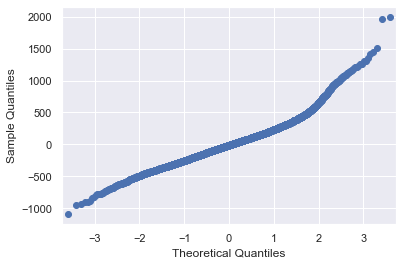

In [48]:
import matplotlib.pyplot as plt 
# Q-Q plot
res = final_ml.resid
sm.qqplot(res)
plt.show()

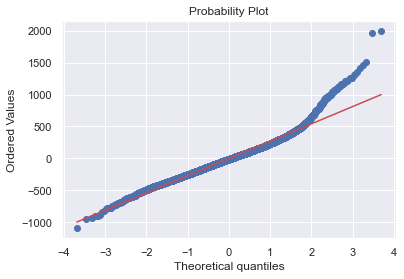

In [49]:
# Q-Q plot
from scipy import stats
import pylab
stats.probplot(res, dist = "norm", plot = pylab)
plt.show()

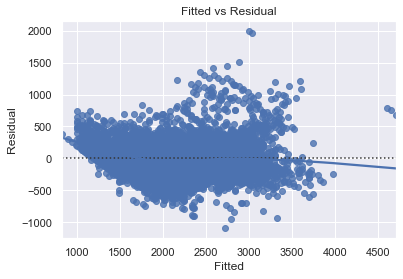

In [50]:
# Residuals vs Fitted plot
sns.residplot(x = pred, y = data.price, lowess = True)
plt.xlabel('Fitted')
plt.ylabel('Residual')
plt.title('Fitted vs Residual')
plt.show()

In [53]:
### Splitting the data into train and test data 
from sklearn.model_selection import train_test_split
data_train, data_test = train_test_split(data1, test_size = 0.2) # 20% test data

In [55]:
# preparing the model on train data 
model_train = smf.ols('price ~ speed+ hd+ ram+ screen+ cd+ multi+ premium+ads+ trend', data = data1).fit()

# prediction on test data set 
test_pred = model_train.predict(data_test)

# test residual values 
test_resid = test_pred - data_test.price
# RMSE value for test data 
test_rmse = np.sqrt(np.mean(test_resid * test_resid))
test_rmse

273.5552398207428

In [56]:
model_train.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.775
Model:                            OLS   Adj. R-squared:                  0.775
Method:                 Least Squares   F-statistic:                     2366.
Date:                Sun, 24 Apr 2022   Prob (F-statistic):               0.00
Time:                        10:27:39   Log-Likelihood:                -43522.
No. Observations:                6183   AIC:                         8.706e+04
Df Residuals:                    6173   BIC:                         8.713e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2221.8379      3.512    632.695      0.000    2214.954    2228.722
speed        197.7007      3.947     50.091      0.000     189.963     205.438
hd           203.4252      7.192     28.284      0.000     189.326     217.524
ram          271.7608      6.051     44.908      0.000     259.898     283.624
screen       111.9447      3.652     30.656      0.000     104.786     119.103
cd            30.2916      4.787      6.328      0.000      20.907      39.676
multi         36.4446      3.987      9.141      0.000      28.628      44.261
premium     -152.4244      3.702    -41.171      0.000    -159.682    -145.167
ads           48.4104      3.876     12.489      0.000      40.812      56.009
trend       -410.6548      4.996    -82.191      0.000    -420.449    -400.860
==============================================================================
Omnibus:                     1003.154   Durbin-Watson:                   1.941
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3132.516
Skew:                           0.834   Prob(JB):                         0.00
Kurtosis:                       6.062   Cond. No.                         4.61
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [57]:
# train_data prediction
train_pred = model_train.predict(data_train)

# train residual values 
train_resid  = train_pred - data_train.price
# RMSE value for train data 
train_rmse = np.sqrt(np.mean(train_resid * train_resid))
train_rmse

276.49457853115564

In [58]:
model_train.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.775
Model:                            OLS   Adj. R-squared:                  0.775
Method:                 Least Squares   F-statistic:                     2366.
Date:                Sun, 24 Apr 2022   Prob (F-statistic):               0.00
Time:                        10:27:50   Log-Likelihood:                -43522.
No. Observations:                6183   AIC:                         8.706e+04
Df Residuals:                    6173   BIC:                         8.713e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2221.8379      3.512    632.695      0.000    2214.954    2228.722
speed        197.7007      3.947     50.091      0.000     189.963     205.438
hd           203.4252      7.192     28.284      0.000     189.326     217.524
ram          271.7608      6.051     44.908      0.000     259.898     283.624
screen       111.9447      3.652     30.656      0.000     104.786     119.103
cd            30.2916      4.787      6.328      0.000      20.907      39.676
multi         36.4446      3.987      9.141      0.000      28.628      44.261
premium     -152.4244      3.702    -41.171      0.000    -159.682    -145.167
ads           48.4104      3.876     12.489      0.000      40.812      56.009
trend       -410.6548      4.996    -82.191      0.000    -420.449    -400.860
==============================================================================
Omnibus:                     1003.154   Durbin-Watson:                   1.941
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3132.516
Skew:                           0.834   Prob(JB):                         0.00
Kurtosis:                       6.062   Cond. No.                         4.61
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""